<a href="https://www.kaggle.com/code/evan08317/thesis-work?scriptVersionId=125928542" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
#Remove dodgy image


In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2
import imghdr

In [178]:
data_dir = '/kaggle/input/tuberculosis-all-dataset/Tuberculosis All Dataset/Kaggle TB dataset Grey(32x32)/Training'

In [ ]:
#After Gray scalling

data_dir1 = '/kaggle/input/tuberculosis-gray-scale'

In [179]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [180]:
os.listdir(data_dir)

['Tuberculosis', 'Normal']

In [ ]:
#After gray scalling
os.listdir(data_dir1)

In [104]:
os.listdir(os.path.join(data_dir,'/kaggle/input/tuberculosis-all-dataset/Tuberculosis All Dataset/Kaggle TB dataset Grey(32x32)/Training/Normal'))

['images771.png',
 'images70.png',
 'images2646.png',
 'images2480.png',
 'images2347.png',
 'images797.png',
 'images1288.png',
 'images535.png',
 'images1501.png',
 'images1311.png',
 'images834.png',
 'images634.png',
 'images2678.png',
 'images706.png',
 'images90.png',
 'images1909.png',
 'images1990.png',
 'images1802.png',
 'images2614.png',
 'images660.png',
 'images2500.png',
 'images1123.png',
 'images85.png',
 'images744.png',
 'images653.png',
 'images1744.png',
 'images657.png',
 'images2228.png',
 'images1885.png',
 'images2083.png',
 'images1917.png',
 'images673.png',
 'images111.png',
 'images1304.png',
 'images2045.png',
 'images906.png',
 'images1692.png',
 'images1008.png',
 'images1226.png',
 'images1952.png',
 'images2254.png',
 'images2601.png',
 'images988.png',
 'images1354.png',
 'images1532.png',
 'images2073.png',
 'images2597.png',
 'images1061.png',
 'images711.png',
 'images233.png',
 'images32.png',
 'images2585.png',
 'images2285.png',
 'images1841.png'

In [181]:
for image_class in os.listdir(data_dir):
    print(image_class)

Tuberculosis
Normal


In [182]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [183]:
img= cv2.imread(os.path.join('/kaggle/input/tuberculosis-all-dataset/Tuberculosis All Dataset/Kaggle TB dataset Grey(32x32)/Training/Normal/images00.png'))

In [184]:
from matplotlib import pyplot as plt

In [185]:
img.shape

(32, 32, 3)

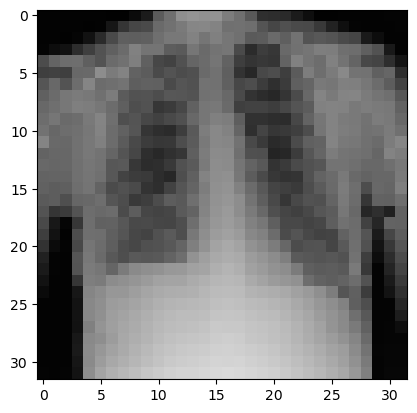

In [186]:
plt.imshow(img)

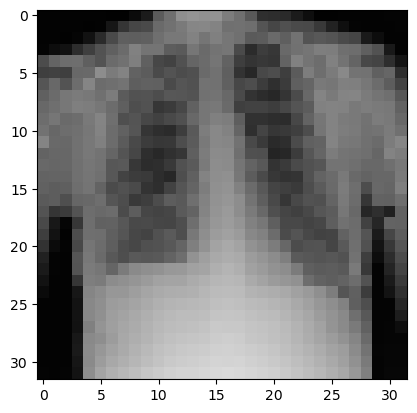

In [187]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [188]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
#Load Data

In [ ]:
tf.data.Dataset??

In [189]:
import numpy as np
from matplotlib import pyplot as plt

In [190]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/tuberculosis-all-dataset/Tuberculosis All Dataset/Kaggle TB dataset Grey(32x32)/Training')

Found 3360 files belonging to 2 classes.


In [191]:
data_iterator = data.as_numpy_iterator()

In [192]:
data_iterator

In [193]:
#Get another batch from the iterator
batch = data_iterator.next()

In [194]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [195]:
#Class 1 = Tuberculosis
#Class 0 = Normal

batch[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

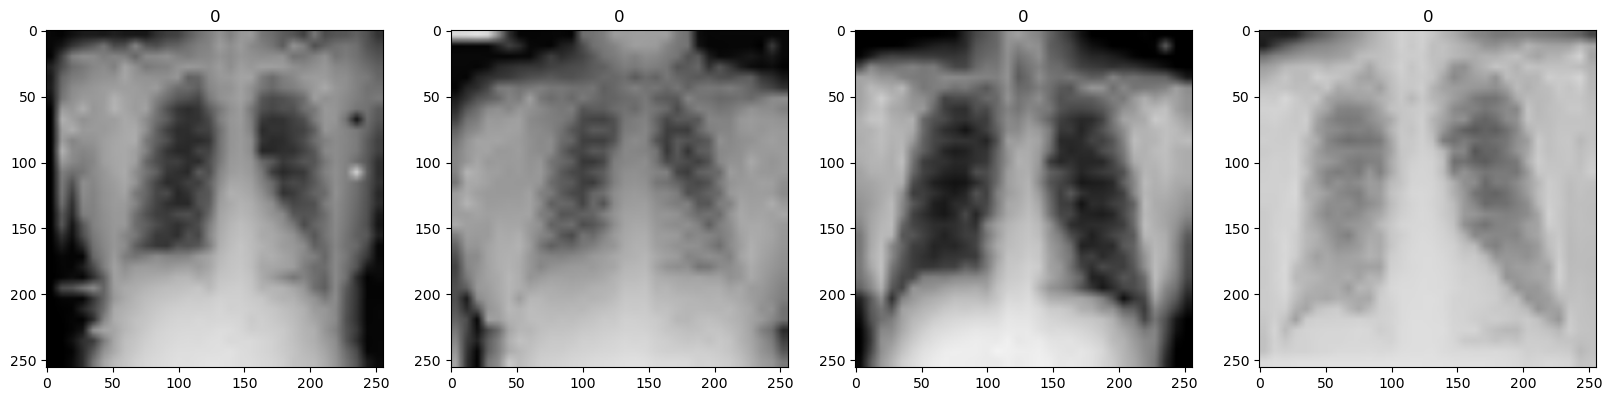

In [196]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [197]:
batch[0].max()

255.0

In [198]:
batch[0].min()

0.0

In [199]:
scaled = batch[0] / 255

In [200]:
scaled.max()

1.0

In [ ]:
#Process Data

In [ ]:
#Scale Data

In [201]:
data = data.map(lambda x,y: (x/255, y))

In [202]:
data.as_numpy_iterator().next()

(array([[[[0.19215687, 0.19215687, 0.19215687],
          [0.19215687, 0.19215687, 0.19215687],
          [0.19215687, 0.19215687, 0.19215687],
          ...,
          [0.90588236, 0.90588236, 0.90588236],
          [0.90588236, 0.90588236, 0.90588236],
          [0.90588236, 0.90588236, 0.90588236]],
 
         [[0.19215687, 0.19215687, 0.19215687],
          [0.19215687, 0.19215687, 0.19215687],
          [0.19215687, 0.19215687, 0.19215687],
          ...,
          [0.90588236, 0.90588236, 0.90588236],
          [0.90588236, 0.90588236, 0.90588236],
          [0.90588236, 0.90588236, 0.90588236]],
 
         [[0.19215687, 0.19215687, 0.19215687],
          [0.19215687, 0.19215687, 0.19215687],
          [0.19215687, 0.19215687, 0.19215687],
          ...,
          [0.90588236, 0.90588236, 0.90588236],
          [0.90588236, 0.90588236, 0.90588236],
          [0.90588236, 0.90588236, 0.90588236]],
 
         ...,
 
         [[0.0627451 , 0.0627451 , 0.0627451 ],
          [0.06274

In [203]:
scaled_iterator = data.as_numpy_iterator()

In [204]:
batch = scaled_iterator.next()

In [205]:
batch[0].min()

0.0

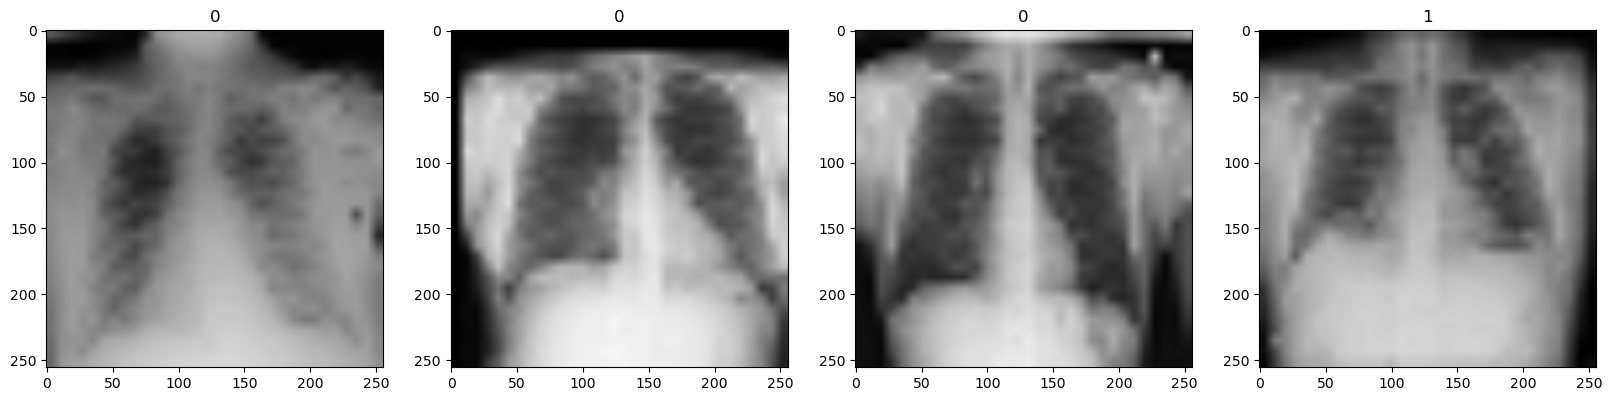

In [206]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [207]:
#Split Data

In [208]:
#Number of Batches
len(data)

105

In [209]:
train_size = int(len(data)*.8)
test_size = int(len(data)*.2)
#val_size = int(len(data)*.2)


In [210]:
train_size + test_size

105

In [211]:
train_size

84

In [ ]:
#val_size

In [212]:
test_size

21

In [270]:
##################
final_test = tf.keras.utils.image_dataset_from_directory('/kaggle/input/tuberculosis-all-dataset/Tuberculosis All Dataset/Random TB Dataset Grey(32x32)')

Found 652 files belonging to 2 classes.


In [244]:
train = data.take(train_size)

test = data.skip(train_size).take(test_size)

In [214]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#Build Deep Learning Model

In [215]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [216]:
model = Sequential()

In [217]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [218]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [219]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
30*30*16

In [ ]:
#Train

In [221]:
logdir='logs'

In [222]:
#Checkpoint (save model)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [223]:
hist = model.fit(train, epochs=10,  callbacks=[tensorboard_callback])

Epoch 1/10
84/84 [==============================] - 95s 1s/step - loss: 0.3320 - accuracy: 0.8642
Epoch 2/10
84/84 [==============================] - 92s 1s/step - loss: 0.2027 - accuracy: 0.9185
Epoch 3/10
84/84 [==============================] - 93s 1s/step - loss: 0.1611 - accuracy: 0.9405
Epoch 4/10
84/84 [==============================] - 92s 1s/step - loss: 0.1178 - accuracy: 0.9594
Epoch 5/10
84/84 [==============================] - 92s 1s/step - loss: 0.1274 - accuracy: 0.9539
Epoch 6/10
84/84 [==============================] - 92s 1s/step - loss: 0.0988 - accuracy: 0.9676
Epoch 7/10
84/84 [==============================] - 91s 1s/step - loss: 0.1009 - accuracy: 0.9661
Epoch 8/10
84/84 [==============================] - 91s 1s/step - loss: 0.0745 - accuracy: 0.9788
Epoch 9/10
84/84 [==============================] - 92s 1s/step - loss: 0.0751 - accuracy: 0.9754
Epoch 10/10
84/84 [==============================] - 93s 1s/step - loss: 0.0567 - accuracy: 0.9821


In [224]:
hist.history

{'loss': [0.3319690525531769,
  0.20268583297729492,
  0.1610715538263321,
  0.11782684922218323,
  0.12739913165569305,
  0.0988222286105156,
  0.10093216598033905,
  0.07448608428239822,
  0.07511377334594727,
  0.05666455626487732],
 'accuracy': [0.8642113208770752,
  0.9185267686843872,
  0.9404761791229248,
  0.9594494104385376,
  0.9538690447807312,
  0.9676339030265808,
  0.9661458134651184,
  0.9787946343421936,
  0.9754464030265808,
  0.9821428656578064]}

KeyError: 'val_loss'

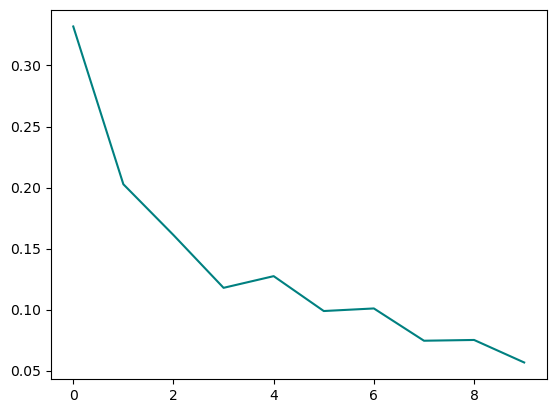

In [281]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

KeyError: 'val_accuracy'

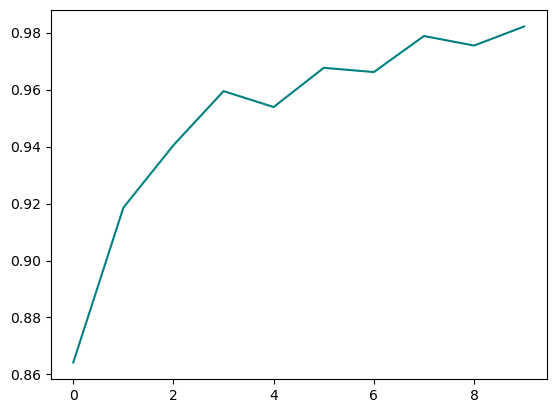

In [282]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Evaluate

In [225]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [226]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [271]:
#len(test)
len(final_test)

21

In [272]:
for batch in final_test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 113ms/step


In [273]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.77952754, shape=(), dtype=float32) tf.Tensor(0.4177215, shape=(), dtype=float32) tf.Tensor(0.7935323, shape=(), dtype=float32)


In [274]:
print(acc.result())

tf.Tensor(0.7935323, shape=(), dtype=float32)


In [ ]:
#Test

In [171]:
import cv2

In [ ]:
img = cv2.imread('/kaggle/input/kaggle-tb-data-gray-scale/TB KAGGLE DATA GREY/TESTING GREY/Tuberculosis/images108.png')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Tuberculosis')
else:
    print(f'Predicted class is Normal')

In [278]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16

from tensorflow.keras.preprocessing.image import img_to_array 
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications import imagenet_utils

from tensorflow.keras.models import Model

import tensorflow as tf

import numpy as np

import cv2

ERROR: Could not find a version that satisfies the requirement imutils (from versions: none)
ERROR: No matching distribution found for imutils
Note: you may need to restart the kernel to use updated packages.


In [277]:
import imutils

ModuleNotFoundError: No module named 'imutils'

In [280]:
#Load the pree-trained CNN from disk
model = VGG16(weights ='imagenet')

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
#Save model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
os.path.join('models','imageclassifier.h5')

In [ ]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))